In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv(r"C:\Users\tnag3\Downloads\animal_deaths_2000_2024.csv")  

# Remove rows with null values
data.dropna(inplace=True)
print("\nData Information:")
print(data.info())



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            250 non-null    int64 
 1   Animal          250 non-null    object
 2   Annual_Deaths   250 non-null    int64 
 3   Region          250 non-null    object
 4   Cause_of_Death  250 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
None


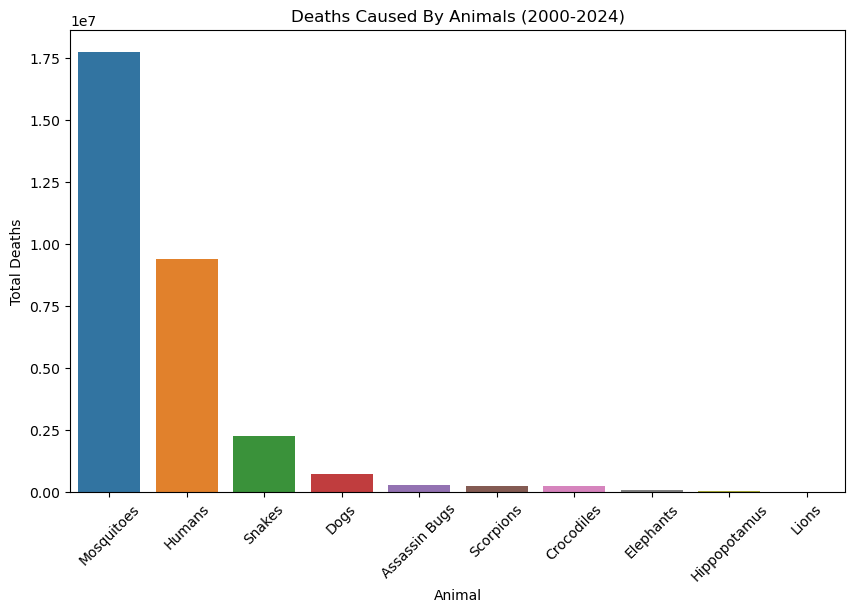

In [72]:
top_10_animals = data.groupby('Animal')['Annual_Deaths'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_animals.index, y=top_10_animals.values)
plt.title("Deaths Caused By Animals (2000-2024)")
plt.ylabel("Total Deaths")
plt.xlabel("Animal")
plt.xticks(rotation=45)
plt.show()


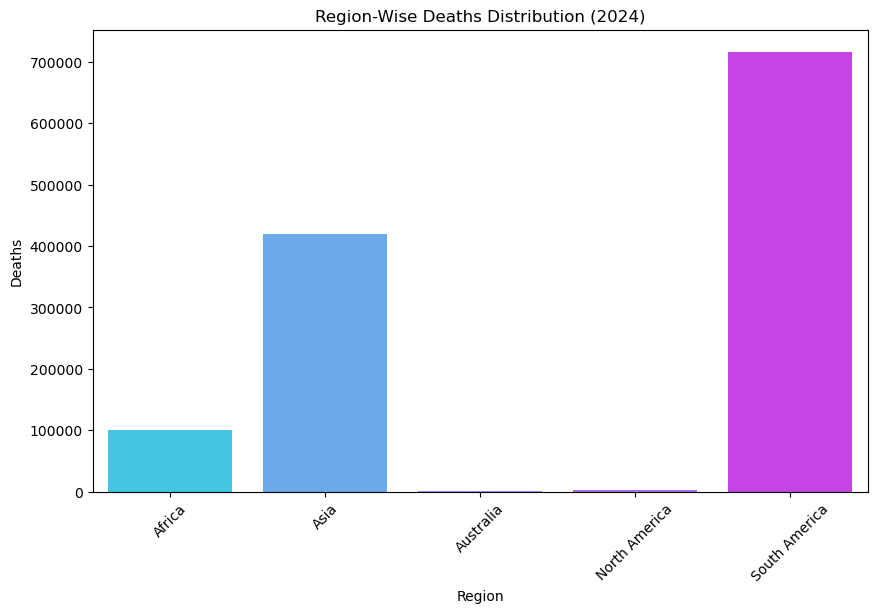

In [92]:

specific_year = 2024
region_distribution = data[data['Year'] == specific_year].groupby('Region')['Annual_Deaths'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="cool")
plt.title(f"Region-Wise Deaths Distribution ({specific_year})")
plt.ylabel("Deaths")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


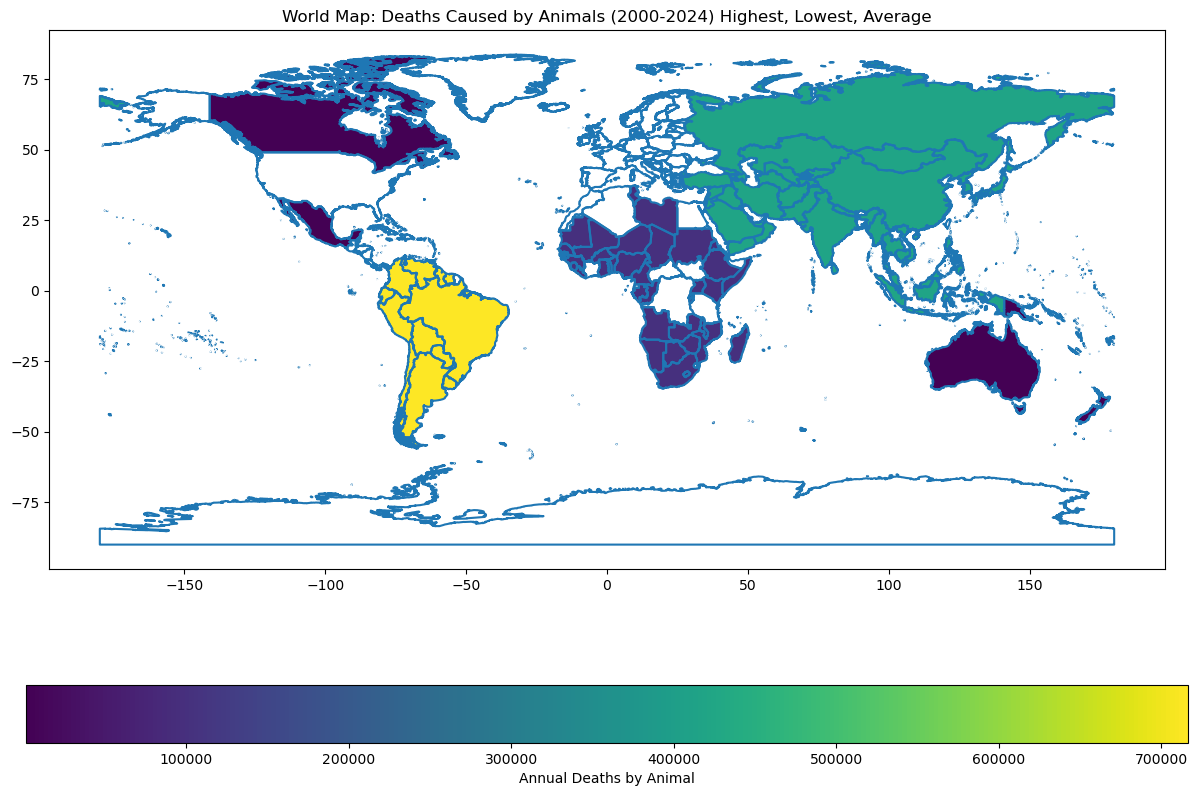

In [113]:

region_to_countries = {
    "Africa": [
        "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", 
        "Central African Republic", "Chad", "Comoros", "Congo", "Democratic Republic of the Congo", 
        "Djibouti", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", 
        "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", 
        "Malawi", "Mali", "Mauritania", "Mauritius", "Mozambique", "Namibia", "Niger", "Nigeria", 
        "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", 
        "South Africa", "South Sudan", "Sudan", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Brunei", "Cambodia", "China", "Cyprus", 
        "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kuwait", "Kyrgyzstan", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", 
        "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Russia", "Saudi Arabia", 
        "Singapore", "South Korea", "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", 
        "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
    ],
    "South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", 
        "Peru", "Suriname", "Trinidad and Tobago", "Uruguay", "Venezuela"
    ],
    "North America": [
        "Canada", "Mexico", "United States"
    ],
    "Europe": [
        "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina", 
        "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", 
        "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", 
        "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", 
        "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", 
        "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom"
    ],
    "Australia": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", 
        "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"
    ]
}


# Create a new column in the dataset for countries belonging to a region
data['Region_Countries'] = data['Region'].map(lambda x: region_to_countries.get(x, []))

# Now load the world shapefile
world = gpd.read_file(r"C:\Users\tnag3\OneDrive\Documents\Datasets\shapefiles\ne_10m_admin_0_countries.shp")

# Merge the world map with the dataset on regions (by country names)
world['region'] = world['NAME'].map(lambda x: next((region for region, countries in region_to_countries.items() if x in countries), "Other"))

# Merge the world dataset with the region distribution
world = world.merge(region_distribution, how="left", left_on="region", right_index=True)

# Plot the world map with the data (color by the number of deaths)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Annual_Deaths', ax=ax, legend=True,
           legend_kwds={'label': "Annual Deaths by Animal",
                        'orientation': "horizontal"})
plt.title("World Map: Deaths Caused by Animals (2000-2024) Highest, Lowest, Average")
plt.show()



